In [1]:
# Name: example_basic
# Authors: Stephan Meighen-Berger, Kruteesh Desai
# A basic example how to use the package

In [2]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
from matplotlib import rc
def find_nearest(array: np.array, value: float):
    
    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [3]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.1  # Linewidth
h_length=0.7  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
low_E_sigma = {
                'numu': [0.45, 0.35, 0.25, 0.15],
                'nue': [0.55, 0.45, 0.35, 0.25],
                'nutau': [0.55, 0.45, 0.35, 0.25]},
high_E_sigma = {
                'numu': [0.25, 0.15, 0.10, 0.09],
                'nue': [0.15, 0.12, 0.09, 0.07],
                'nutau': [0.15, 0.12, 0.09, 0.07] }

In [5]:
# Some example settings
#config['atmospheric showers']['interaction model'] = 'SIBYLL2.3c'
#config['atmospheric showers']['theta angles'] = np.linspace(0., 90., 91)|
#config['atmospheric showers']['particles of interest']=['nue']
config['general']['detector'] = 'POne'
config['general']['pone type'] = 'old'
config['general']['density'] = 'NFW'  # 'NFW'
config['general']["channel"] = "W"  # "\\[Nu]\\[Mu]" 
config['pone']['smearing'] = 'unsmeared'
config['pone']['low E sigma'] = {'numu': 0.25,
                                 'nue': 0.25,
                                 'nutau': 0.25}
config['pone']['high E sigma'] = {'numu': 0.15,
                                 'nue': 0.07,
                                 'nutau': 0.07}
#low E sigma': {
#                'numu': [0.45, 0.35, 0.25, 0.15],
#                'nue': [0.55, 0.45, 0.35, 0.25],
#                'nutau': [0.55, 0.45, 0.35, 0.25]},
#            'high E sigma': {
#                'numu': [0.25, 0.15, 0.10, 0.09],
#                'nue': [0.15, 0.12, 0.09, 0.07],
#                'nutau': [0.15, 0.12, 0.09, 0.07]

In [6]:
surface_fluxe = pickle.load(open("../data/" +
                                                   "surf_store_v1.p", "rb"))

In [7]:
pdm = PDM()

unsmeared
POne
pone background
Starting Calculation
False
Finished Calculating Background


/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:364: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:365: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
  0%|          | 0/3 [00:00<?, ?it/s]/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/limit_calc.py:197: RuntimeWarning: invalid value encountered in true_divide
  np.nan_to_num(x[self._t_d:]**2 /
100%|██████████| 3/3 [00:00<00:00,  6.27it/s]


In [8]:
e_grid = pdm._shower_sim.egrid
e_width = pdm._shower_sim.ewidth

In [9]:
_bkgrd_ice_data = [
                        '../data/icecube_10year_ps/events/IC40_exp.csv',
                        '../data/icecube_10year_ps/events/IC59_exp.csv',
                        '../data/icecube_10year_ps/events/IC79_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_I_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_II_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_III_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_IV_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_V_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_VI_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_VII_exp.csv',
                    ]

In [10]:
e_grid = e_grid
eff_po_15 = pdm._aeff.spl_A15(e_grid)
eff_po_51 = pdm._aeff.spl_A51(e_grid)
eff_po_55 = pdm._aeff.spl_A55(e_grid)

eff_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/eff_area_ice.pkl','rb'))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


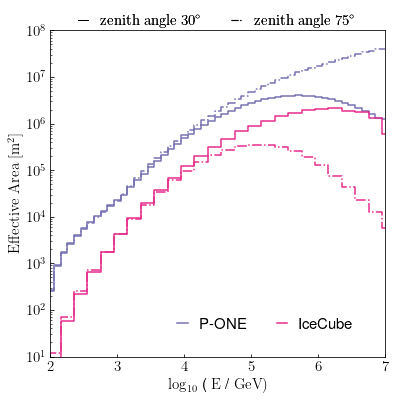

In [11]:
figure, ax1 = plt.subplots(1,1,figsize=(std_size,std_size), sharex=True) 


ax1.step(np.log10(e_grid), eff_po_15, color=color_pone, label=r'P-ONE' )
ax1.step(np.log10(e_grid), eff_ice[30], color=color_ice, label=r'IceCube')
ax1.step(np.log10(e_grid), eff_po_55, color=color_pone, linestyle='-.')
ax1.step(np.log10(e_grid), eff_ice[75], color=color_ice, linestyle='-.')

ax1.set_yscale("log")

ax1.set_xlabel(r'$\log_{10}$ ( $\textrm{E}$ / $ \textrm{GeV} )$ ', fontsize=fontsize)

ax1.set_ylabel(r'$\textrm{Effective Area}$ $[ \textrm{m}^2 ]$', fontsize=fontsize)

ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')



ax1.set_xlim(2, 7)

ax1.set_ylim(1e1,1e8)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +0.1),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
legend_elements_s = [Line2D([0], [0], color='k',lw=1),
                   Line2D([0], [0], color='k', linestyle='-.', lw=1.1)
                  ]
labels_s = [r'$\textrm{zenith angle}$ $30^{\circ}$',
          r'$\textrm{zenith angle}$ $75^{\circ}$'
          ]
lgd2 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(0.95, +1.03),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.add_artist(lgd2)
# ---------------------------------------------
# Showing the image
plt.show()
figure.savefig(PICS + "Final_eff_area"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [12]:
# Grids
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
m_4_id = find_nearest(mass_grid, 1e4)
m_6_id = find_nearest(mass_grid, 1e6)
m_3_id = find_nearest(mass_grid, 1e3)
m_5_id = find_nearest(mass_grid, 1e5)
sv_56 = find_nearest(sv_grid, 5.6e-22)
# The limit calculation


In [13]:
dphi_2=np.loadtxt(open("../data/m_1e2.csv"), delimiter = ",")
dphi_2[dphi_2[:,0].sort()]

dphi_4=np.loadtxt(open("../data/m_1e4.csv"), delimiter = ",")
dphi_4[dphi_4[:,0].sort()]

dphi_6=np.loadtxt(open("../data/m_1e6.csv"), delimiter = ",")
dphi_6[dphi_6[:,0].sort()]
#dphi_ice=np.loadtxt(open("../data/icecube.csv"), delimiter = ",")
#dphi_ice[dphi_ice[:,0].sort()]

array([[[4.71523093e+04, 1.53459280e-10],
        [5.60497613e+04, 1.96288387e-10],
        [7.04102047e+04, 2.26695859e-10],
        [9.25043476e+04, 2.62434648e-10],
        [1.15056452e+05, 2.83833139e-10],
        [1.48558994e+05, 3.20599461e-10],
        [1.93633804e+05, 3.92318799e-10],
        [2.52276868e+05, 5.18154640e-10],
        [3.09297992e+05, 6.89257983e-10],
        [3.56977496e+05, 9.89944054e-10],
        [3.87710108e+05, 2.29779058e-09],
        [4.53992662e+05, 3.17683977e-09],
        [4.82168854e+05, 4.38613018e-09],
        [5.21973227e+05, 6.05574703e-09],
        [5.73914043e+05, 9.73019151e-09],
        [6.31028068e+05, 7.24924411e-09],
        [6.93825892e+05, 2.03091762e-08],
        [7.45239618e+05, 1.59696980e-08],
        [7.98043927e+05, 1.22436833e-08],
        [8.51217508e+05, 1.76706590e-09],
        [9.15185392e+05, 1.37202694e-09],
        [9.96285866e+05, 1.14931629e-10]]])

In [14]:
np.array(sv_grid)

array([1.00000000e-26, 4.21696503e-26, 1.77827941e-25, 7.49894209e-25,
       3.16227766e-24, 1.33352143e-23, 5.62341325e-23, 2.37137371e-22,
       1.00000000e-21])

In [15]:
dphi_4=UnivariateSpline(dphi_4[:,0],dphi_4[:,1],k=1,s=0,ext=1)
#mass_grid[0],sv_grid[-1],mass_grid[-1],sv_grid[-1]
#dphi_ic=UnivariateSpline(dphi_ice[:,0],dphi_ice[:,1],k=1,s=0,ext=1)
dphi_6=UnivariateSpline(dphi_6[:,0],dphi_6[:,1],k=1,s=0, ext=1)
#dphi_2=UnivariateSpline(dphi_2[:,0],dphi_2[:,1],k=1,s=0, ext=1)


In [16]:


shower_flux = pickle.load(open('../data/shower.p','rb'))
shower_po = shower_flux[2][45]['numu']
surface_fluxe_ice = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower_ice = surface_fluxe_ice[20][3] # background fluxes at 20° ----



In [17]:
np.logspace(2,6,53)[26]
sv_7 = find_nearest(sv_grid, 7e-22)
m_2_id = find_nearest(mass_grid, 1e2)

/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:365: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:364: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)


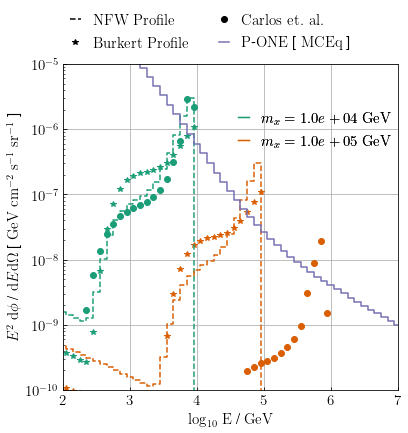

In [18]:
from asyncio import constants


figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
#  $<\sigma\nu>=%.1e$ $cm^{3}s^{-1}$' ,sv_grid[sv_56]
#label=r'$m_{x}=1.0e+04$ $\textrm{GeV} (Carlos$ $et.al)$'
#label=r'$m_{x}=1.0e+06$ $\textrm{\textrm{\textrm{GeV}}} (Carlos$ $et.al)$'
#ax1.set_title(r'$\sigma\nu = %.1e$' % (sv_grid[sv_56]), y=1.17, fontsize=fontsize)
#ax1.step(np.log10(e_grid), dphi_2(e_grid),'o', color="y")
plt.plot(np.log10(e_grid), dphi_4(e_grid), 'o', color=color_4)
plt.plot(np.log10(e_grid), dphi_6(e_grid), 'o',color=color_6)
#ax1.step(e_grid, (pdm._dm_nu.extra_galactic_flux(e_grid,mass_grid[0],sv)) * e_grid**2.,'-.',
#         label=r'$m_{x}$ = %.1e , $<\sigma\nu>$ = %.1eGeV Sim'%(mass_grid[0],sv))
burkert_flux_4 = (pdm._dm_nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
burkert_flux_6 = (pdm._dm_nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_2 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
nfw_flux_3 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_3_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_3_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_4 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_6 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_5 = (pdm._dm_nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_5_id],sv_grid[sv_7])) + pdm._dm_nu.galactic_flux(e_grid,mass_grid[m_5_id],sv_grid[sv_56], 2 , 2.3e23)
#ax1.step(np.log10(e_grid), burkert_flux_4 * e_grid**2., color=color_4, linest

#nfw_flux_2 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
#nfw_flux_3 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_3_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[3],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_4 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[26],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_6 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_6_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[-1],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_5 = (pdm._dm_nu.extra_galactic_flux_c(e_grid,mass_grid[m_5_id],sv_grid[sv_7]))


ax1.step([0],[0],'--', color='k', label=r'$\textrm{NFW Profile}$' )
ax1.step([0],[0],'*' , lw=1, color='k', label=r'$\textrm{Burkert Profile}$' )
plt.plot([0],[0],'o', color='k', label=r'$\textrm{Carlos et. al.}$' )
# 4*pi factor from now on is because of the plot y axis not being diffused meaning the d\Omega integral hasnt been done ------------------------
ax1.step(np.log10(e_grid), burkert_flux_4 * e_grid**2. / (4*np.pi), '*', color=color_4
         )
ax1.step(np.log10(e_grid), burkert_flux_6 * e_grid**2. / (4*np.pi), '*', color=color_6
         )
ax1.step(np.log10(e_grid), nfw_flux_2 * e_grid**2. / (4*np.pi), '--', color="y",
        )
ax1.step(np.log10(e_grid), nfw_flux_4 * e_grid**2. / (4*np.pi), '--', color=color_4,
        )
#ax1.step(np.log10(e_grid), nfw_flux_5 * e_grid**2., '*', color='b',
#         )
ax1.step(np.log10(e_grid), nfw_flux_6 * e_grid**2. / (4*np.pi), '--', color=color_6,
         )
ax1.step(np.log10(e_grid), (shower_po + pdm._Detector.astro_flux())*e_grid**2, color=color_pone, label=r'$\textrm{P}$-$\textrm{ONE}$ [ $\textrm{MCEq}$ ]') # Karlsruhe Corsika
# ax1.step(np.log10(e_grid), (shower_ice + pdm._Detector.astro_flux())*e_grid**2, color=color_ice, label=r'IceCube')
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r'$\log_{10}$ $\textrm{E}$ / $\textrm{GeV}$', fontsize=fontsize)
ax1.set_ylabel(r'\textbf{$E^2$} $\textrm{d}$\textbf{$\phi$} / \textrm{d}\textbf{$E$}\textrm{d}$\Omega$   [ $\textrm{GeV}$ $\textrm{cm}^{-2}$ $\textrm{s}^{-1}$ $\textrm{sr}^{-1}$ ]', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2, 7)
ax1.set_ylim(1e-10,1e-5)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.9, +1.1),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
legend_elements_s = [
        #Line2D([0], [0], color='y', linestyle='-', lw=1.3),
        #Line2D([0], [0], color=color_4,linestyle='-',lw=1.3),
        Line2D([0], [0], color=color_4,linestyle='-',lw=1.3),
        #Line2D([0], [0], color='b', linestyle='-', lw=1.3),
        Line2D([0], [0], color=color_6, linestyle='-', lw=1.3)
                  ]
labels_s = [
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_4_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_5_id]),
        r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_6_id])
          ]
lgd2 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(1.02, +0.8),
             ncol=1, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.add_artist(lgd2)
# ---------------------------------------------
# Showing the image
plt.grid()
plt.show()
figure.savefig(PICS + "Final_flux"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [19]:
m_6_id, m_5_id

(61, 61)

In [20]:
signal_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/limits_signal_IceCube.pkl','rb'))
signal_com_un = pickle.load(open("../data/14_04/unsmeared/signal_grid_combined_un.pkl","rb"))
signal_pone_un = pickle.load(open("../data/signal_grid_POne_un_NFW.pkl","rb"))
signal_pone_sm = pickle.load(open('../data/limits_signal_POne.pkl', 'rb'))
signal_pone_un_bur = pickle.load(open('../data/signal_grid_POne_un_Burkert.pkl','rb'))

In [21]:
#back_po = pickle.load(open('../data/background_pone_sm.pkl','rb'))
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/background_ice.pkl','rb'))
back_ice_ob = pickle.load(open('../data/tmp_files/background_ice_data_total.pkl','rb'))
#back_comb =  pickle.load(open('../data/background_combined.pkl','rb'))
background_pone_unsm = pickle.load(open('../data/background_pone_unsm.pkl','rb'))
background_pone_sm_45_25 = pickle.load(open('../data/tmp_files/background_pone.pkl', 'rb'))
# background_pone_sm_35_15 = pickle.load(open('../data/14_04/smeared/35_15/background_pone.pkl', 'rb'))
# background_pone_sm_25_10 = pickle.load(open('../data/14_04/smeared/25_10/background_pone.pkl', 'rb'))
# background_pone_sm_15_009 = pickle.load(open('../data/14_04/smeared/15_009/background_pone.pkl', 'rb'))

In [22]:
pdm._signal_data['numu'][sv_56][0].shape

(121,)

In [23]:
tmp_counts = { 0 : {"numu"}}

In [24]:
signal_pone_un['numu'].shape

(9, 9, 121)

IndexError: index 40 is out of bounds for axis 0 with size 9

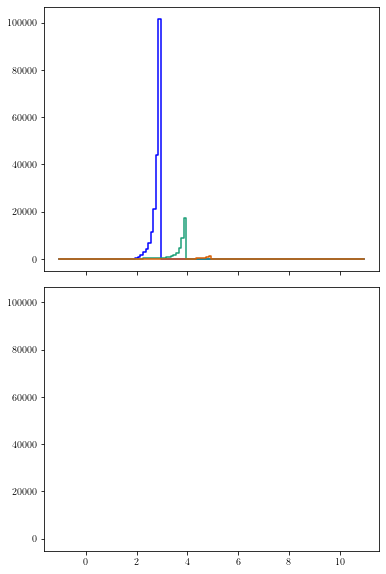

In [25]:
fig = plt.figure(figsize=(std_size,std_size+4))
gs = fig.add_gridspec(2, 1, hspace=0.06, wspace=0.05)
(ax1), (ax2) = gs.subplots( sharex=True, sharey=True)


ax1.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][m_3_id]):]), pdm._signal_data['numu'][sv_56][m_3_id], color='b', linestyle='-',
         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_3_id]))
ax1.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][0]):]), pdm._signal_data["numu"][sv_56][m_4_id], color=color_4, linestyle='-',
         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
ax1.step(np.log10(e_grid[-len(pdm._signal_data['numu'][sv_56][0]):]), pdm._signal_data["numu"][sv_56][m_6_id], color=color_6, linestyle='-',
         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_6_id]))



ax2.step(np.log10(e_grid[-len(signal_pone_sm['numu'][6][0]):]), signal_pone_un["numu"][sv_56][m_3_id], color='b', linestyle='-')#,
         #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[2]))
ax2.step(np.log10(e_grid[-len(signal_pone_sm['numu'][6][0]):]), signal_pone_un["numu"][sv_56][m_4_id], color=color_4, linestyle='-')#,
         #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[4]))
ax2.step(np.log10(e_grid[-len(signal_pone_sm['numu'][6][0]):]), signal_pone_un["numu"][sv_56][m_6_id], color=color_6, linestyle='-')#,
         #label=r'$m_{x}=%.1e$ $GeV$' % (mass_grid[-1]))

ax1.step(np.log10(e_grid), background_pone_sm_45_25['nue'], '-', color=color_pone)

ax2.step(np.log10(e_grid), background_pone_unsm['nue'], '-', color=color_pone)

ax1.set_yscale("log")
#ax1.set_xlabel(r'$\log_{10}$( E / $GeV$ )', fontsize=fontsize+6)
ax1.set_ylabel(r'$ \#$  $\textrm{Counts}$', fontsize=fontsize+2)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize+2, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize+2, direction='in')
ax1.set_xlim(2, 6)
ax1.set_ylim(1e0,1e6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.13, +1.1),
                 ncol=2, fontsize=fontsize+2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

#ax2.set_xscale("log")
ax2.set_yscale("log")
#ax2.set_xlabel(r'$\log_{10}$( E / $GeV$ )', fontsize=fontsize+6)
ax2.set_ylabel(r'$\#$  $\textrm{Counts}$', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize+2, direction='in')
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize+2, direction='in')
ax2.set_xlim(2, 6)
ax2.set_ylim(1e0,1e6)

ax2.set_xlabel(r'$\log_{10}$( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize+2)
h = [Line2D([0], [0], color=color_pone,lw=2)]
l = [r'$\textrm{P}$-$\textrm{ONE}$'
          ]
lgd1 = ax2.legend(h, l, loc=7, bbox_to_anchor=(0.95, +0.8),
                 ncol=2, fontsize=fontsize+2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax2.add_artist(lgd1)
h_i = [Line2D([0], [0], color=color_pone ,lw=2)]
l_i = [r'$\textrm{P}$-$\textrm{ONE}$ ($\textrm{Reconstructed}$)'
          ]
lgd2 = ax1.legend(h_i, l_i, loc=7, bbox_to_anchor=(0.98, +0.8),
                 ncol=2, fontsize=fontsize+2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd2)

plt.show()
fig.savefig(PICS + "Final_signal"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [26]:
flux={}
flux[15]={}
flux[85]={}
flux[120]={}
flux[15]['numu'] = (dphi_4(e_grid)) * e_grid**(-2)
flux[85]['numu'] = flux[15]['numu']
flux[120]['numu'] = flux[15]['numu']
flux[15]['nue']=flux[85]['nue']=flux[120]['nue']=flux[15]['nutau']=flux[85]['nutau']=flux[120]['nutau']=flux[15]['numu']
#_lit=pdm._Detector.sim2dec(flux,True)["numu"]


In [27]:
# Loading comparison data
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
unitarity = (unitarity[unitarity[:, 0].argsort()])

#limits_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/limits_results_IceCube.pkl','rb'))
limits_pone_unsm = pickle.load(open("../data/tmp_files/unsmeared/limits_results_POne_un_NFW.pkl","rb"))
#limits_com = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/14_03/data/limits_results.pkl", "rb"))
#limits_pone_unsm = pickle.load(open("../data/28_03_02/unsmeared/limits_results_POne_unsm.pkl","rb"))

limits_pone_45_25= pickle.load(open("../data/14_04/smeared/45_25/limits_results_POne_sm_NFW.pkl","rb"))

limits_pone_35_15= pickle.load(open("../data/14_04/smeared/35_15/limits_results_POne_sm.pkl","rb"))

limits_pone_25_10= pickle.load(open("../data/14_04/smeared/25_10/limits_results_POne_sm.pkl","rb"))

limits_pone_15_009= pickle.load(open("../data/14_04/smeared/15_009/limits_results_POne_sm.pkl","rb"))


cl_lit_ice = np.loadtxt('../data/IceCube_HE.csv', delimiter=",")
cl_lit_ice = (cl_lit_ice[cl_lit_ice[:, 0].argsort()])
xx,yy = np.meshgrid(np.log10( np.logspace(1, 6, 20)),np.log10( np.logspace(1, 6, 20)))

In [28]:
limits_pone_unsm

{'numu': array([[1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
         1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
         1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
         1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
         1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
         1.00000000e+000, 9.99982634e-001, 9.99971968e-001,
         9.99971029e-001, 9.99896596e-001, 9.99901113e-001,
         9.99758093e-001, 9.99826043e-001, 9.99904875e-001,
         9.99712056e-001, 9.99836972e-001, 9.99910129e-001,
         9.99676888e-001, 9.99850787e-001, 9.99543232e-001,
         9.99810731e-001, 9.99556254e-001, 9.99824116e-001,
         9.99925886e-001, 9.99767979e-001, 9.99888254e-001,
         9.99942971e-001, 9.99792399e-001, 9.99885548e-001,
         9.99734466e-001, 9.99898629e-001, 9.99956765e-001,
         9.99870463e-001, 9.99937067e-001, 9.99880174e-001,
         9.99960406e-001, 9.99932553e-001, 9.99936032e-001,
         9.99916729e-001, 9.9995

# Fill through function for the band between smeared and unsmeared combined limits !!!!!!!! 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


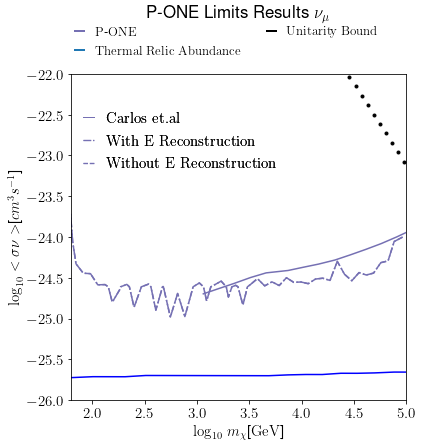

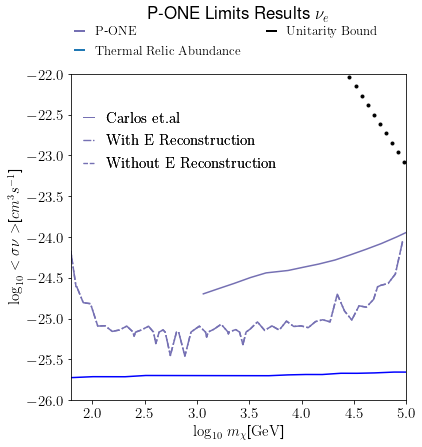

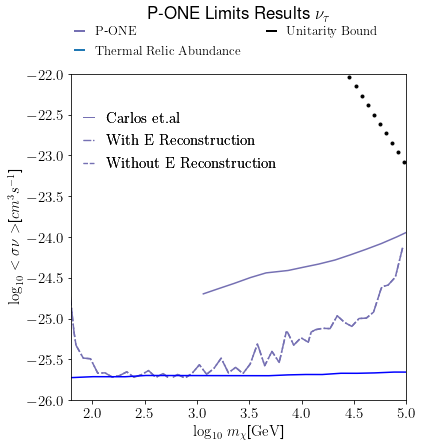

In [29]:
color = ['black', 'orange', 'purple']
color_sm = ['red', 'black', 'purple']
color_pa = ['']
color_pa = ['']
color_pa = ['']
color_pa = ['']
name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
ll = ['-','--', '-.', 'dotted']
 # std_size, std_size * 6. / 8.),
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    # ---------------------------------------------
    # Plotting
    plt.title(r'P-ONE Limits Results ' + name[j],fontsize=fontsize+2, y=1.15)  # +' Scaling Correction = '+str(config['advanced']['scaling correction'])
    
    ax1.contour(pdm.results[i], levels = [0.95], colors=color_pone,  linestyles='-.',
               origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                       min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    
    ax1.contour(limits_pone_unsm[i], levels = [0.95], colors=color_pone,  linestyles='--',
                origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))
# 
    #ax1.contour(limits_pone_45_25['numu'], levels = [0.9], colors=color_sm[j],  linestyles=ll[0],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    #ax1.contour(limits_pone_35_15[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[1],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax1.contour(limits_pone_25_10[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[2],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax1.contour(limits_pone_15_009[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[3],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))

    #break
    #ax1.contour(limits_ice["numu"], levels=[0.9], colors='yellow',origin='lower',linestyles='-',
    #                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))#
    #ax1.contour(limits_pone_unsm["numu"], levels=[0.9], colors='green',origin='lower',linestyles='-.',
    #                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_pone, label='literature P-ONE')
    #ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]),'m',label='literature  IceCube')
    ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
             label='Thermal Relic Abundance')
    ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.k', 
             label='Unitarity Bound')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log_{10}$ $m_{\chi}$[\textrm{GeV}]", fontsize=fontsize)
    ax1.set_ylabel(r"$\log_{10}$ $<\sigma \nu>$[$cm^{3} s^{-1}$]", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
      # 
    #ax1.text(3.5, -23.7, "IceCube Simulation", fontsize=fontsize)

    #ax1.text(3.2, -24.8, r"P-ONE $\nu_\mu$", fontsize=fontsize)
    #ax1.text(3.2, -24.9, r" $\nu_e$", fontsize=fontsize)
    #ax1.text(3.1, -25.3, r" $\nu_\tau$", fontsize=fontsize)

    # ---------------------------------------------
    # Legend
    legend_elements_s = [Line2D([0], [0], color=color_pone, lw=2),
                       Line2D([0], [0], color=color_thermal,  lw=2),
                       Line2D([0], [0], color=color_unitary,  lw=2)
                      ]
    labels_s = [r'$\textrm{P}$-$\textrm{ONE}$',
              r'$\textrm{Thermal Relic Abundance}$',
              r'$\textrm{Unitarity Bound}$',
              ]

    lgd1 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)



    legend_elements = [Line2D([0], [0], color=color_pone, lw=1),
                       Line2D([0], [0], linestyle='-.', color=color_pone,  lw=1.2),
                       Line2D([0], [0], linestyle='--', color=color_pone,  lw=1.2)
                      ]
    labels = [r'$\textrm{Carlos et.al}$',
              r'$\textrm{With E Reconstruction}$',
              r'$\textrm{Without E Reconstruction}$']  # Without E reconstruction}$']
    lgd2= ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.65, 0.795),
                     ncol=1, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd2)            
    ax1.set_xlim(1.8, max(np.log10(mass_grid)))
    ax1.set_ylim(min(np.log10(sv_grid)), -22)
    ax1.add_artist(lgd1)
    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Limits_Example_all_%s.png" %(i),
               bbox_inches='tight', dpi=export_dpi,  facecolor='white')


In [30]:
# pickle.dump(pdm.results, open('../data/nfw_unsmea_limits.pkl', 'wb'))


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


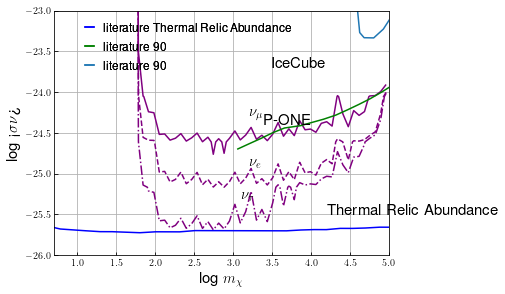

In [31]:
# All Limits-------------------------------------------
# Setup
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Plotting
ax1.contour(pdm.results["numu"], levels = [0.9], colors='purple', linestyles='-',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nue"], levels = [0.9], colors='purple', linestyles='--',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)), 
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nutau"], levels = [0.9], colors='purple', linestyles='-.',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
#ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
         label='literature Thermal Relic Abundance')
#ax1.contour(limits_ice["numu"], levels=[0.9], colors='red',origin='lower',
#                                extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
#                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))), legend='IceCube')
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L P-ONE')
ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]), label='literature 90% C.L IceCube')
# ---------------------------------------------
# Axis options
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"log $m_{\chi}$", fontsize=fontsize)
ax1.set_ylabel(r"log <$\sigma\nu$>", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')
ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)),-23.0)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
ax1.text(3.5, -23.7, "IceCube", fontsize=fontsize)
ax1.text(3.4, -24.4, "P-ONE", fontsize=fontsize)
ax1.text(3.2, -24.3, r"$\nu_\mu$", fontsize=fontsize)
ax1.text(3.2, -24.9, r"$\nu_e$", fontsize=fontsize)
ax1.text(3.1, -25.3, r"$\nu_\tau$", fontsize=fontsize)
ax1.text(4.2, -25.5, "Thermal Relic Abundance", fontsize=fontsize)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "All_Limits.png",
               bbox_inches='tight', dpi=export_dpi)

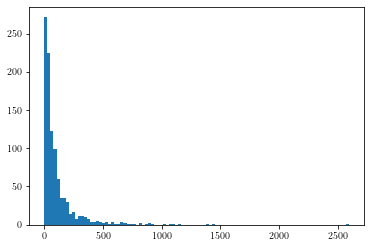

In [32]:
samples = np.random.lognormal(4, 0.3 * 4., 1000)
count, bins, ignored = plt.hist(samples, 100, density=False, align='mid')

In [33]:
mid_e_grid = np.logspace(3, 4, 100)

In [34]:
spl_mid_mean = UnivariateSpline([1e3, 1e4], [700., 1e4], k=1)
spl_mid_sigma = UnivariateSpline([1e3, 1e4], [0.45, 0.35], k=1)

In [35]:
def local_log_normal(x, mu, sigma):
    """Distribution function 
    x = E_grid
    mu = log(E) 
    sigma = fraction of E  ( so no fraction or percentage ) ( standard deviation as per definition )
    """
    sigma = ( sigma  )
    pdf = np.exp(-(np.log((x)) - mu )**2 / (2 * sigma**2)) / ( sigma * np.sqrt(2 * np.pi))

    return pdf

In [36]:
def _log_norm(E, mu, sigma):
    """Distribution function
    x = E_grid
    mu = log(E)
    sigma = fraction of E * E ( so no fraction or percentage )
    ( standard deviation as per definition )
    """
    pdf = (np.exp(- (np.log((E)) - mu)**2 / (2 * sigma**2)) /
           (sigma * np.sqrt(2 * np.pi)))
    return pdf

In [37]:
def distro_parms(Etrue):
    """ Parameter estimation function depending  on the E_true
    [mu] = [log10(E/GeV)]
    sigma = log10(E/GeV)
    """
    if Etrue < 1e3:
        mu = np.log(700)
        sigma = 0.45 
    elif 1e3 <= Etrue <= 1e4:
        mu = np.log(spl_mid_mean(Etrue))
        sigma = spl_mid_sigma(Etrue) 
    else:
        mu = np.log(Etrue)
        sigma = 0.35 
    return mu, sigma


#def smearing(Etrue, number_of_events, sampling_grid=hist_grid):
#    mu, sigma = distro_parms(Etrue)
#    return (
#        np.nan_to_num(local_log_normal(sampling_grid, mu, sigma)) *
#        number_of_events
#    )


In [38]:
samples_fun = []
samples = []
samples_fun_log = []
for i,E in enumerate(e_grid):
    mu, sigma = distro_parms(E)
    samples.append(np.random.lognormal((mu), sigma, len(e_grid))) # Axis0 = E, meaning the axis0 elements are the E_ture for which axis1 correspondece as distribution !!! Thats why transpose for imshow
    samples_fun.append(np.nan_to_num(local_log_normal(e_grid, mu, sigma)))
    samples_fun_log.append(np.nan_to_num(_log_norm(e_grid, mu, sigma))* np.log10(pdm._shower_sim.ewidth))
    

In [39]:
from matplotlib.colors import LogNorm

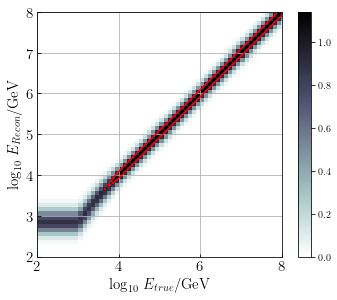

In [40]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6./8. ), sharex=True)
z_p=ax1.imshow((np.array(samples_fun).T), origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid)) ),
               cmap=plt.get_cmap('bone_r'))
#figure.colorbar(z_p, ax=(ax1))
ax1.contour(np.array(samples_fun).T, levels = [0.95], colors='red', linestyles='-',
            origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))) )
#ax1.contour(np.array(samples).T, levels = [0.68], colors='purple', linestyles='-',
#           origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))), norm=LogNorm() )
#ax1.contour((samples_fun*e_grid).T, levels = [1.2], colors='purple', linestyles='-',
#            origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid))) )
figure.colorbar(z_p, ax=(ax1))

ax1.set_xlabel(r"$\log_{10}$ $E_{true} / \textrm{GeV}$", fontsize=fontsize)
ax1.set_ylabel(r"$\log_{10}$ $E_{Recon} / \textrm{GeV}$", fontsize=fontsize)
#ax1.set_ylabel(r"Distribution fraction", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2,8)
ax1.set_ylim(2,8)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.grid()
figure.savefig(PICS + "Reconstruction_"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [41]:
cmap_string= ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2',
'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r',
'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 
'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 
'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink',
'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 
'winter', 'winter_r']


In [42]:
for i,_ in enumerate(e_grid):
    print(np.trapz(samples_fun[i], x=e_grid))

781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
781.450077545557
921.6451910158253
1254.7630207209354
1672.7898215197768
2196.9606243645158
2853.6052124161542
3675.2654910234123
4702.017118344217
5983.02980473176
7578.427817141758
9561.583271467256
12034.59333081895
15150.655364776601
19073.545044052873
24012.17054895888
30229.5316964198
38056.725639260156
47910.578

NameError: name 'count_np' is not defined

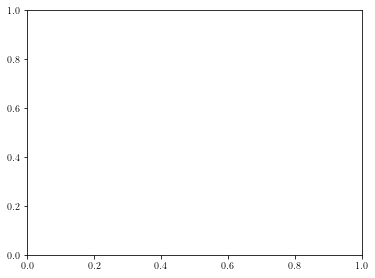

In [43]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6./8. ), sharex=True)
ax1.imshow((count_np*e_grid).T, origin='lower', extent=( min(np.log10(e_grid)), max(np.log10(e_grid)), min(np.log10(e_grid)), max(np.log10(e_grid)) ))
ax1.set_xlabel(r"log $E_{true}$", fontsize=fontsize)
ax1.set_ylabel(r"log $E_{Recon}$", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')

# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

plt.grid()

In [ ]:
np.array(count_np).shape

In [ ]:
count_np